In [46]:
var("x")
poly_x = 12*x**4+7*x**3-2*x**2-x
poly_x=poly_x*(1/12)
show(poly_x)

x^4 + 7/12*x^3 - 1/6*x^2 - 1/12*x

In [47]:

var("y")
t=-(7/(12*4))
poly_y = poly_x(x = y +t).expand().simplify_full()
show(poly_y)

y^4 - 113/384*y^2 - 137/13824*y + 4277/589824

In [48]:
pqr = {'p':-(113/384), 'q': -(137/13824), 'r': (4277/589824)}
show(pqr)

{'p': -113/384, 'q': -137/13824, 'r': 4277/589824}

In [49]:

var("s p q r")
poly_s = 2*s**3 - p*s**2 - 2*r*s + r*p - q**2/4
show(poly_s)

-p*s^2 + 2*s^3 - 1/4*q^2 + p*r - 2*r*s

In [50]:
poly_s_n = poly_s(**pqr)
show(poly_s_n)

2*s^3 + 113/384*s^2 - 4277/294912*s - 13199279/6115295232

In [51]:
sols = solve(poly_s_n, s)

In [52]:
for sol in sols:
    show(sol)

s == -1/48*sqrt(17) - 1/2304

s == 1/48*sqrt(17) - 1/2304

s == (-337/2304)

In [53]:

s_0 = sols[2].rhs()
show(s_0)

-337/2304

In [54]:
var("y s p q")
poly_y_1 = y**2 - y*sqrt(2*s - p) + q/(2*sqrt(2*s - p)) + s
poly_y_2 = y**2 + y*sqrt(2*s - p) - q/(2*sqrt(2*s - p)) + s

In [55]:
show(poly_y_1)
show(poly_y_2)

y^2 - sqrt(-p + 2*s)*y + s + 1/2*q/sqrt(-p + 2*s)

y^2 + sqrt(-p + 2*s)*y + s - 1/2*q/sqrt(-p + 2*s)

In [56]:
poly_y_1_n = poly_y_1(**pqr, s=s_0)
poly_y_2_n = poly_y_2(**pqr, s=s_0)
show(poly_y_1_n)
show(poly_y_2_n)

y^2 - 1/24*y - 611/2304

y^2 + 1/24*y - 7/256

In [57]:
b=[-1/24,1/24]
c=[-(611/2304),-7/256]
X=[0,0,0,0]

In [61]:
k=0
for i in range(2):
    D=b[i]**2-4*c[i]
    X[k]=((-b[i]+D**(1/2))/2)
    show(n(X[k]))
    k+=1
    X[k]=((-b[i]-D**(1/2))/2)
     
    show(n(X[k]))
    k+=1
     
    
    

0.536221536535541

-0.494554869868874

0.145833333333333

-0.187500000000000

In [62]:
sols = solve(poly_y_1_n, y)
sols.extend(solve(poly_y_2_n, y))

In [63]:

for i, sol in enumerate(sols):
    show(f"x_{i} = ", sol + t)
    X[i]=X[i]+t


'x_0 = ' y - 7/48 == -1/8*sqrt(17) - 1/8

'x_1 = ' y - 7/48 == 1/8*sqrt(17) - 1/8

'x_2 = ' y - 7/48 == (-1/3)

'x_3 = ' y - 7/48 == 0

In [68]:
 print("алгебраическое представление:")
for i in range(4):
     print(f"x{i} = ", n(X[i]))

алгебраическое представление:
x0 =  0.390388203202208
x1 =  -0.640388203202208
x2 =  0.000000000000000
x3 =  -0.333333333333333


In [65]:
print("тригонаметрическое представление:")

for i in range(4):
    phi = atan2(X[i].imag(), X[i].real()).n()
    x_abs = X[i].abs().n()
    x_trig = x_abs*(cos(phi, hold=True) + I*sin(phi, hold=True))
    print(f"x{i} = ", (x_trig))

тригонаметрическое представление:
x0 =  0.390388203202208*cos(0.000000000000000) + 0.390388203202208*I*sin(0.000000000000000)
x1 =  0.640388203202208*cos(3.14159265358979) + 0.640388203202208*I*sin(3.14159265358979)
x2 =  0.000000000000000
x3 =  0.333333333333333*cos(3.14159265358979) + 0.333333333333333*I*sin(3.14159265358979)


In [66]:
print("экспоненцонное представление:")
for i in range(4):
    phi = atan2(X[i].imag(), X[i].real()).n()
    x_abs = X[i].abs().n()
    if(phi==NaN):
        phi=(pi/2).n()
    x_exp = f"{x_abs}" + r"\cdot e^{" + f"{phi}" + r"\cdot i}"
    show(html(f"x${i}$ = ${x_exp}$"))

экспоненцонное представление:


x<script type="math/tex">0</script> = <script type="math/tex">0.390388203202208\cdot e^{0.000000000000000\cdot i}</script>

x<script type="math/tex">1</script> = <script type="math/tex">0.640388203202208\cdot e^{3.14159265358979\cdot i}</script>

x<script type="math/tex">2</script> = <script type="math/tex">0.000000000000000\cdot e^{1.57079632679490\cdot i}</script>

x<script type="math/tex">3</script> = <script type="math/tex">0.333333333333333\cdot e^{3.14159265358979\cdot i}</script>

In [67]:
sols = solve(poly_x, x)
for i, sol in enumerate(sols):
    show(f"x_{i} = ", sol)

'x_0 = ' x == -1/8*sqrt(17) - 1/8

'x_1 = ' x == 1/8*sqrt(17) - 1/8

'x_2 = ' x == (-1/3)

'x_3 = ' x == 0

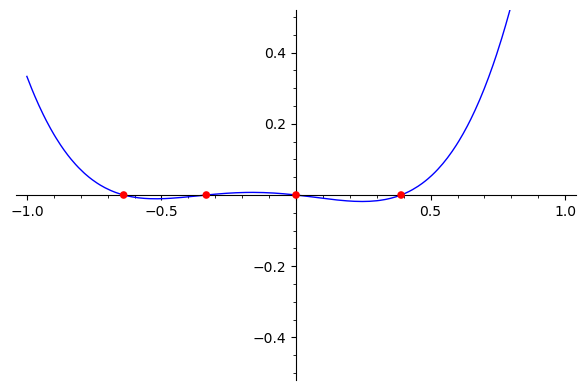

In [46]:

intervals_of_constancy = plot(poly_x, xmin=-1, xmax=1, ymin=-0.5, ymax=0.5)
for i in range(4):
    intervals_of_constancy  += point(((X[i]), 0), color="red", size=30, zorder=10)
intervals_of_constancy.show()